In [1]:
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")

from qtcipy import interpolate

In [2]:
sys.path.append(os.environ["PYQULAROOT"])

# Fermi surface QTCI
Let us the QTCI to compute a Fermi surface

In [15]:
from pyqula import geometry
g = geometry.square_lattice()
g = g.get_supercell(4)
h = g.get_hamiltonian()
h.add_onsite(1.0)
h.add_rashba(0.3)


In [21]:
import numpy as np

def f(x,y):
    """Function to sample, the Fermi surface"""
    eps = 1e-1
    return h.get_fermi_surface(k0=[x,y],nk=1,delta=eps,write=False)[2][0]


In [24]:
# sample the function with QTCI

xlim = [0.,1.]
ylim = [0.,1.]

# create the interpolator
IP = interpolate.Interpolator(f,tol=1e-2,nb=10,xlim=xlim,ylim=ylim,dim=2)



# check the evaluated points as a reference
rse,zse = IP.get_evaluated()
print(len(rse),"evaluations")
rse = np.array(rse)


# evaluate the function and the interpolation
nn = 100
xs = np.linspace(xlim[0],xlim[1],nn,endpoint=False)
ys = np.linspace(ylim[0],ylim[1],nn,endpoint=False)
zs,zsi = [],[]
for x in xs:
    for y in ys:
        zsi.append(IP(x,y))


40873 evaluations


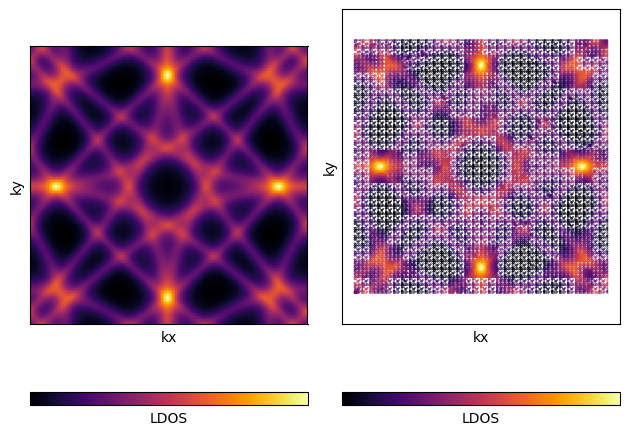

In [27]:
# now plot the data
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(np.flip(np.array(zsi).reshape(nn,nn),axis=0).T,vmax=np.max(zsi),cmap="inferno")
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("kx") ; plt.ylabel("ky")
plt.colorbar(ticks=[],label="LDOS",orientation="horizontal")

plt.subplot(1,2,2)
rse = np.array(rse)
plt.scatter(rse[:,0],rse[:,1],c=zse,s=0.1,cmap="inferno",vmax=np.max(zse))
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("kx") ; plt.ylabel("ky")
plt.axis("equal")
plt.colorbar(ticks=[],label="LDOS",orientation="horizontal")

plt.tight_layout()


plt.show()

# Interpolate the surface KDOS
We will use the QTCI method to compute the KDOS of a topological system

In [50]:
from pyqula import geometry
g = geometry.square_lattice()
h = g.get_hamiltonian()
h.add_onsite(3.8)
h.add_rashba(0.5)
h.add_exchange([0.,0.,.5])
h.add_swave(0.1)


def f(k,e):
    """Function to compute the surface KDOS"""
    eps = 1e-2
    return h.get_kdos(delta=eps,energies=[e],kpath=[[k,0.,0.]],write=False)[2][0]


In [61]:
import numpy as np

xlim = [0.,1.]
ylim = [-1.5,1.5]

# create the interpolator
IP = interpolate.Interpolator(f,tol=1e-2,nb=20,xlim=xlim,ylim=ylim,dim=2)

# check the evaluated points as a reference
rse,zse = IP.get_evaluated()
print(len(rse),"evaluations")

# evaluate the function and the interpolation
nn = 400
xs = np.linspace(xlim[0],xlim[1],nn,endpoint=False)
ys = np.linspace(ylim[0],ylim[1],nn,endpoint=False)
zs,zsi = [],[]
for x in xs:
    for y in ys:
        zsi.append(IP(x,y))



83416 evaluations


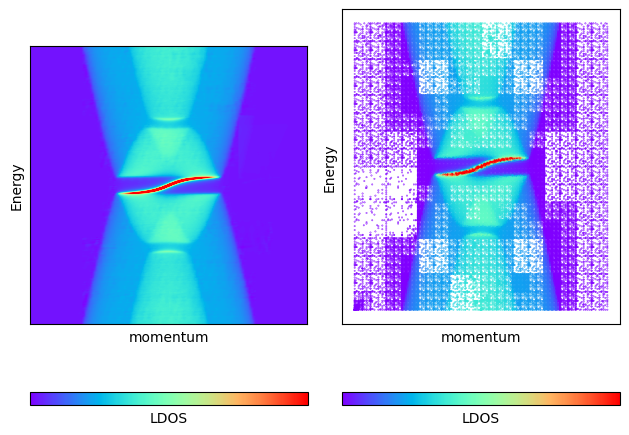

In [63]:
# now plot the data
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(np.flip(np.array(zsi).reshape(nn,nn),axis=0).T,vmax=np.max(zsi)/3,cmap="rainbow")
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("momentum") ; plt.ylabel("Energy")
plt.colorbar(ticks=[],label="LDOS",orientation="horizontal")

plt.subplot(1,2,2)
rse = np.array(rse)
plt.scatter(rse[:,0],rse[:,1],c=zse,s=0.1,cmap="rainbow",vmax=np.max(zse)/3,)
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("momentum") ; plt.ylabel("Energy")
plt.colorbar(ticks=[],label="LDOS",orientation="horizontal")

plt.tight_layout()


plt.show()

In [12]:
# this is quite inefficient at this stage
#g = IP.integrate(axis=0,return_qtci=True)

#ds = [g(y) for y in ys]
#plt.plot(ys,ds)

# Berry curvature and Chern number
Use the QTCI to compute the Berry curvature and Chern number

In [66]:
from pyqula import geometry
g = geometry.square_lattice()
h = g.get_hamiltonian()
h.add_onsite(3.8)
h.add_rashba(0.5)
h.add_exchange([0.,0.,.5])
h.add_swave(0.1)


def f(kx,ky):
    """Function to compute the Berry curvature"""
    return h.get_berry_curvature(kpath=[np.array([kx,ky,0.])],write=False,dk=1e-4)[2][0]


In [67]:
import numpy as np

xlim = [0.,1.]
ylim = [0.,1.]

# create the interpolator
IP = interpolate.Interpolator(f,tol=1e-1,nb=20,xlim=xlim,ylim=ylim,dim=2)

# check the evaluated points as a reference
rse,zse = IP.get_evaluated()
print(len(rse),"evaluations")

# evaluate the function and the interpolation
nn = 100
xs = np.linspace(xlim[0],xlim[1],nn,endpoint=False)
ys = np.linspace(ylim[0],ylim[1],nn,endpoint=False)
zs,zsi = [],[]
for x in xs:
    for y in ys:
        zsi.append(IP(x,y))

print("Chern number",IP.integrate()/(2*np.pi))


24291 evaluations
Chern number 1.0031243063989241


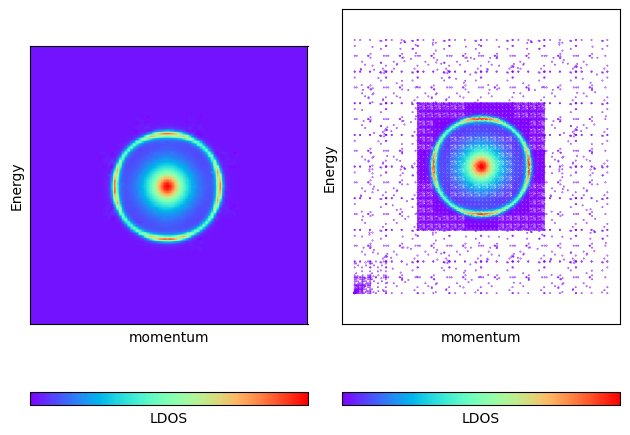

In [71]:
# now plot the data
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(np.flip(np.array(zsi).reshape(nn,nn),axis=0).T,vmax=np.max(zsi),cmap="rainbow")
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("momentum") ; plt.ylabel("Energy")
plt.colorbar(ticks=[],label="LDOS",orientation="horizontal")

plt.subplot(1,2,2)
rse = np.array(rse)
plt.scatter(rse[:,0],rse[:,1],c=zse,s=0.1,cmap="rainbow",vmax=np.max(zse))
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("momentum") ; plt.ylabel("Energy")
plt.axis("equal")
plt.colorbar(ticks=[],label="LDOS",orientation="horizontal")

plt.tight_layout()


plt.show()

In [48]:
#IP.errors
#IP.ranks
#plt.plot(IP.ci.tci.pivoterrors) #/ qtci.tci.maxsamplevalue
#IP.ci.tci.maxsamplevalue

# Compute a multifermisurface with QTCI
Use QTCI for a three-dimensional function, fermi surface at different chemical potentials

In [79]:
from pyqula import geometry
g = geometry.square_lattice()
g = g.get_supercell(4)
h = g.get_hamiltonian()

import numpy as np
def f(x,y,e):
    eps = 1e-1
    return h.get_fermi_surface(k0=[x,y],e=e,nk=1,delta=eps,write=False)[2][0]


In [80]:

xlim = [-1.,1.]
ylim = [-1.,1.]
zlim = [-3.0,3.0]

# create the interpolator
IP = interpolate.Interpolator(f,tol=1e-1,nb=10,xlim=xlim,ylim=ylim,zlim=zlim,dim=3)



# check the evaluated points as a reference
rse,zse = IP.get_evaluated()
print(len(rse),"evaluations")
rse = np.array(rse)



439513 evaluations


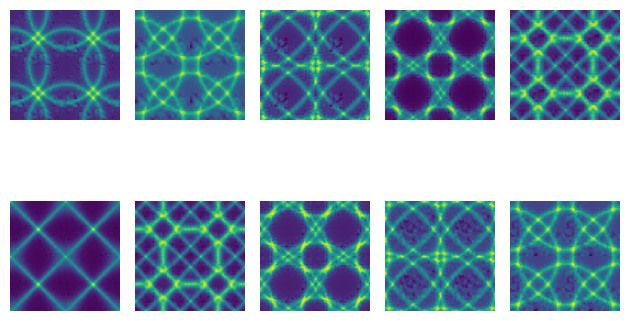

In [89]:
import matplotlib.pyplot as plt

# evaluate the function and the interpolation
nn = 100
xs = np.linspace(xlim[0],xlim[1],nn,endpoint=False)
ys = np.linspace(ylim[0],ylim[1],nn,endpoint=False)
def getfs(z):
    zs,zsi = [],[]
    for x in xs:
        for y in ys:
            zsi.append(IP(x,y,z))
    return np.array(zsi).reshape(nn,nn).T

import matplotlib.pyplot as plt

es = np.linspace(-3.0,3.0,10,endpoint=False)
ie = 0
for e in es:
    ie += 1
    plt.subplot(2,len(es)//2,ie)
    zsi = getfs(e)
    plt.imshow(zsi) ; plt.axis("off")

plt.tight_layout()

plt.show()